<a href="https://colab.research.google.com/github/janetstefanov/macro_psets/blob/main/Econ_210_Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import pylab

from numpy.polynomial import Polynomial
from scipy.interpolate import CubicSpline

First want to plot power utility for $\gamma$ = 5 on (0,5]

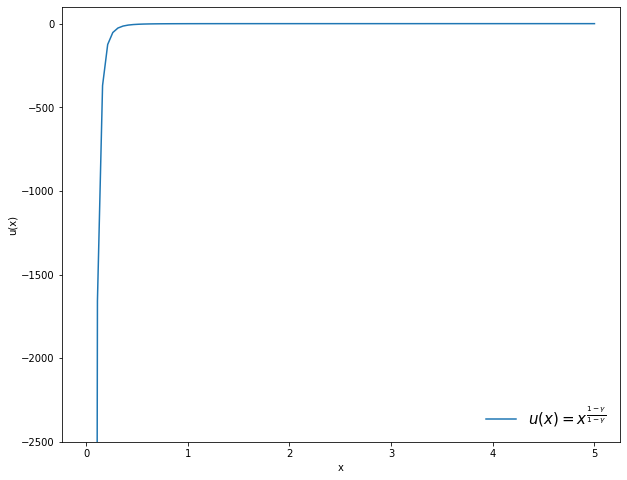

In [72]:
gamma = 5
x = np.linspace(0.01,5,100)

def utility(x, gamma):
    return x**(1-gamma)/(1-gamma)

u = utility(x, gamma)

plt.rc('legend', fontsize=15)
##plot the function
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,u, label = r'$u(x) = x^\frac{{1-\gamma}}{1-\gamma}$')
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_ylim(-2500,100)
ax.legend(frameon = False)
# show the plot
plt.show()

Want to plot the power utility function against it's third order polynonmial approximation

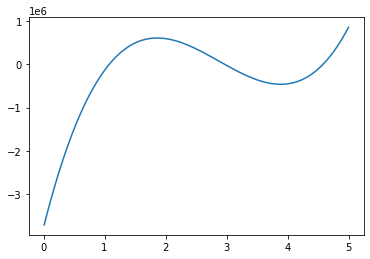

In [73]:
import numpy.polynomial.polynomial as polynom
#cubic = polynom.Polynomial.fit(x,u, deg = 3, domain = (0,5))
cubic = Polynomial.fit(x, u, 3)
#cubic = polynom.fit(x,u, deg = 3, domain = (0,5))
plt.plot(x, cubic(x), label = 'cubic')

<Figure size 432x288 with 0 Axes>

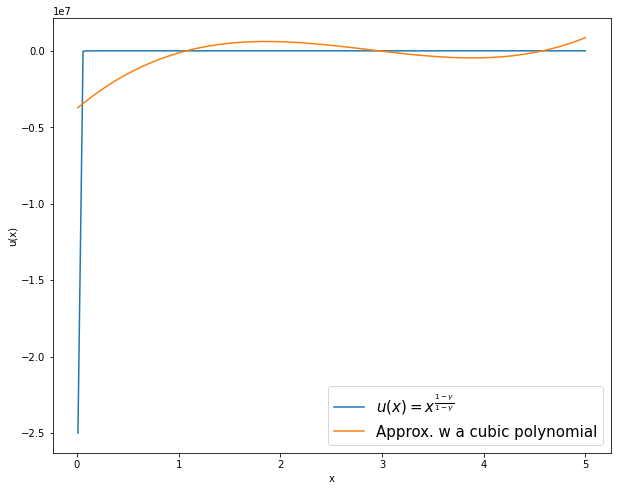

In [75]:
u = utility(x, gamma)
y = cubic(x)
#plot
plt.rc('legend', fontsize=15)
##plot the function
fig = plt.figure()
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,u, label = r'$u(x) = x^\frac{{1-\gamma}}{1-\gamma}$')
ax.plot(x,y, label = r'Approx. w a cubic polynomial')
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
#ax.set_ylim(-5,2)
#ax.set_xlim(.001,.05)
ax.legend()
# show the plot
plt.show()

Now approximate using cubic spline

<Figure size 432x288 with 0 Axes>

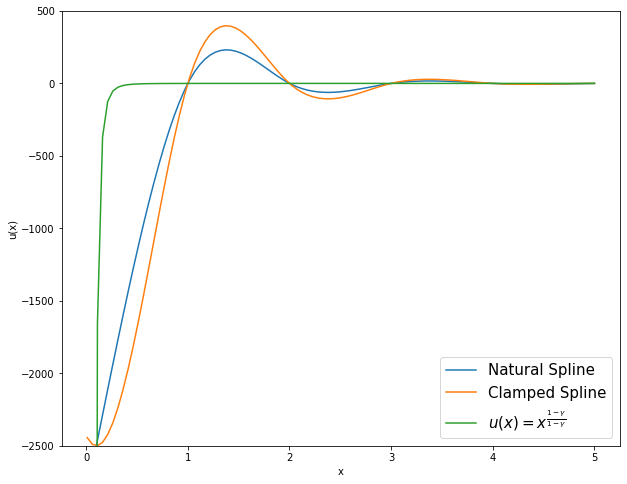

In [76]:
knots = np.array([0.1, 1, 2, 3, 4, 5])
u_knots = utility(knots, gamma)
#natural spline means 2nd derivative at the end points is 0
spline = interpolate.CubicSpline(knots, u_knots, bc_type = 'natural')
spline_clamped = interpolate.CubicSpline(knots, u_knots, bc_type = 'clamped')
fig = plt.figure()
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,spline(x), label = r'Natural Spline')
ax.plot(x,spline_clamped(x), label = r'Clamped Spline')
ax.plot(x,u, label = r'$u(x) = x^\frac{{1-\gamma}}{1-\gamma}$')
#ax.plot(x,y, label = r'Approx. w a cubic polynomial')
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_ylim(-2500,500)
ax.legend()
plt.show()

Plot derivatives of u(x), cubic spline, and third order polynomial

<Figure size 432x288 with 0 Axes>

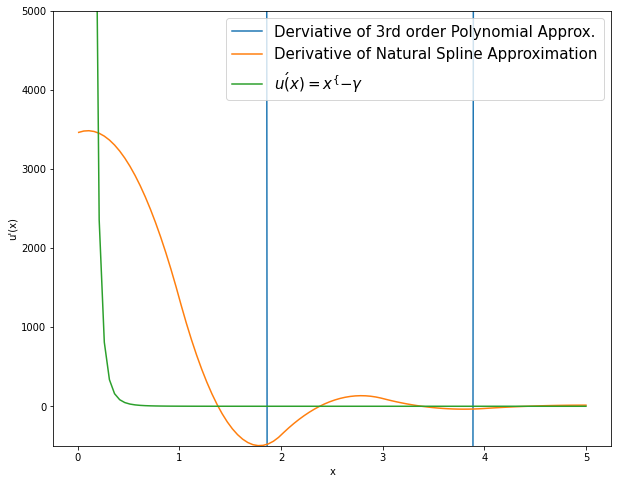

In [84]:
def u_prime(x, gamma):
    return x**(-gamma)

u_derivative = u_prime(x, gamma)
cubic_prime = cubic.deriv(m = 1)
spline_prime = spline.derivative(1)

fig = plt.figure()
fig, ax = plt.subplots(figsize = (10,8))
#derivative of cubic shows up badly in same window as spline, gamma
ax.plot(x,cubic_prime(x), label = r'Derviative of 3rd order Polynomial Approx.')
ax.plot(x,spline_prime(x), label = r'Derivative of Natural Spline Approximation')
ax.plot(x,u_derivative, label = r'$u\'(x) = x^\{-\gamma}$')
ax.set_xlabel('x')
ax.set_ylabel("u'(x)")
#ax.set_ylim(-10,5000)
ax.set_ylim(-500,5000)
ax.legend()
plt.show()

**Question 2: The Bellman Equation**

The sequence problem is given as: 

\begin{equation*}
\begin{aligned}
& \underset{\{c_t, b_{t+1}, k_{t+1}\}}{\text{max}}
& & \sum_{t=0}^{\infty} {\beta^t}u(c_t) \\
& \text{subject to}
& c_t + b_{t+1} + k_{t+1}  &=  f(k) + Rb_t \\
&& b_{t+1} &\geq -\phi k_{t+1}\\
&& k_{t+1} &\geq 0 
\end{aligned}
\end{equation*}
where $b_0, k_0$ are given.
\\
To write this as a Bellman equation, introduce the state variable $w_t = f(k_t) + Rb_t$, defined to be the cash on hand in period t. This state variable choice emphasizes that in each period t, cash on hand is split between the output of the entrepreneur's production technology and the return on last period's bonds and the entrepreneur is indifferent between the two types of assets conditional on the level of wealth. Using the first constraint of the sequence problem, I can solve for consumption in terms of cash on hand, next-period bonds and capital: 
\begin{align*}
    c_t &= f(k) + Rb_t - b_{t+1} - k_{t+1} \\
    c_t &= w_t - b_{t+1} - k_{t+1} \\
\end{align*}

Sub this into the sequence problem to include cash on hand: 
\begin{align*}
& \underset{\{w_t, b_{t+1}, k_{t+1}\}}{\text{max}}
& & \sum_{t=0}^{\infty} {\beta^t}u(w_t - b_{t+1} - k_{t+1}) \\
& \text{subject to}
& c_t + b_{t+1} + k_{t+1}  &=  w_{t+1} \\
&& b_{t+1} &\geq -\phi k_{t+1} \\
&& k_{t+1} &\geq 0 
\end{align*}

We now derive the Bellman equation formulation. Define: 
\begin{align}
V(w) = & \underset{\{w_t, b_{t+1}, k_{t+1}\}}{\text{max}} \sum_{t=0}^{\infty} {\beta^t}u(w_t - b_{t+1} - k_{t+1})
\end{align}
In the t=0 term of the infinite sum, note that $\beta^t =0$. Split out this term as follows: 
\begin{align*}
V(w) = & \underset{\{w_t, b_{t+1}, k_{t+1}\}}{\text{max}} u(w_t - b_{t+1} - k_{t+1}) +  \sum_{t=1}^{\infty} {\beta^t}u(w_t - b_{t+1} - k_{t+1}) \\
\end{align*}
Re-index with i = t-1 and factor out a $\beta$ from the infinite sum: 
\begin{align}
V(w) = & \underset{\{w_t, b_{t+1}, k_{t+1}\}}{\text{max}} u(w_t - b_{t+1} - k_{t+1}) + \beta \sum_{i=0}^{\infty} {\beta^i}u(w_i - b_{i+1} - k_{i+1})
\end{align}
But now we "stare at" the RHS of equation (2) and see that the infinite sum term is identical to the formulation of equation (1) for time i=t+1. In other words, the infinite sum is given on the RHS of equation (2) can be renamed as $V(w')$.  \\

The Bellman equation can then be represented as: 
\begin{align*}
V(w) = u(w - b' - k') + \beta V(w')
\end{align*}
where $w' = f(k') + Rb'$ and $c + w = b' - k'$. The problem can further be reduced by substituting the expression for $w'$ into the RHS of the Bellman equation: 
\begin{align}
V(w) &=  \underset{\{b' \geq -\phi k', k' \geq 0\}}{\text{max}} u(w - b' - k') + \beta V(f(k')+Rb')
\end{align}

**Deriving the Analytical Solution** 

I now substitute in the given functional forms for utility and production and form the Lagrangean by rearranging the constraint: 

\begin{align}
V(w) &=  \underset{\{k' \geq 0\}}{\text{max}} log(w - b' - k') + \beta V(k'^{\frac{1}{3}}+Rb') + \lambda(b' + \phi k')
\end{align}


**Non-Binding Constraint**


If the constraint is non-binding, then the Lagrangean collapses into the Bellman equation (equation (1)). We can take FOCs as follows: 

\begin{align*}
&k: \frac{-1}{w-b'-k'} + \beta V'(k'^{\frac{1}{3}} + Rb')(\frac{1}{3}k'^{\frac{-2}{3}}) = 0 \\
&b: \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb') = 0 \\
\end{align*}

We now set these equation to each other to get: 
\begin{align*}
\frac{-1}{w-b'-k'} + \beta V'(k'^{\frac{1}{3}} + Rb')(\frac{1}{3}k'^{-\frac{2}{3}}) &=  \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb')  \\
\beta V'(k'^{\frac{1}{3}} + Rb')(\frac{1}{3}k'^{-\frac{2}{3}}) &=  \beta RV'(k'^{\frac{1}{3}} + Rb')  \\
\end{align*}
Because we are given that the value function is strictly increasing (and $\beta > 0$), this implies that its derivative is never 0, and therefore it is mathematically valid to divide it $\beta V'$ out:

\begin{align*}
(\frac{1}{3}k'^\frac{-2}{3}) &= R \\
k'^{-\frac{2}{3}}) &= 3R \\
k^* &= (3R)^{-\frac{3}{2}}
\end{align*}

It then follows that the optimal choice of $k^*$ is independent of w. I still need to solve the FOCs for the optimal bond choice and then show that this optimal choice of bonds is increasing in wealth. To do so, I make use of the FOC with respect to bonds above and substitute the optimal capital choice I just derived: 
\begin{align*}
0 &= \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb') \\
\beta RV'(k'^{\frac{1}{3}} + Rb') & = \frac{1}{w-b'-k'} \\
w - b' - k'^* &= \frac{1}{\beta RV'(k'*^{\frac{1}{3}} + Rb')} \\
b ' & = w - (3R)^{-\frac{3}{2}} - \frac{1}{\beta RV'((3R)^{-\frac{3}{2}} + Rb')}
\end{align*}
The final expression above characterizes the optimal bond choice for cash on hand w.

I now show that the optimal choice of bonds is increasing in cash on hand w. To do so, I proceed by the implicit function theorem on the first-order condition for bond choice. In particular, since the first-order condition is effectively in terms of two variables, namely w and b'($k^*$ is previously determined independently), I use the implicit function theorem on Euclidean space $R^2$. To meet the hypotheses of the implicit function theorem on $R^2$, I need a continuously differentiable function F (the FOC in b) and a point $(w, b'^*)$ such that $F(w, b'^*) = 0$ (technically only need this to be a constant). I also need that $\frac {\partial F}{\partial w}(w, b'^*) \neq 0$. If this holds, then in a neighborhood of the optimum $(w, b'^*)$ the function $F(w, b) = 0$ for a unique bond choice b. The IFT also gives us that b is a continuous function of w, which is intuitively nice because this follows with our economic intuition that there is a continuous mapping between the level of wealth and the choice of bondholdings. \footnote{I can also define the FOC in b as F(w, b') and the IFT also holds with the roles of w, b' reversed. This step justifies the 
"arbitrary" ordering I select for w, b' in the FOC function definition above. To show $\frac {\partial F}{\partial b}(w, b'^*) \neq 0$:
\begin{align}
\frac{\partial F}{\partial b} &= R\beta V''(k^* + Rb)R - \frac{-1(-1)(-1)}{(w-b'- k^*)^2} \\
&= R^2\beta V''(k^* + Rb) - \frac{-1}{(w-b'- k^*)^2} 
\end{align}
Suppose that equation (6) is 0: 
\begin{align*}
R^2\beta V''(k^* + Rb) - \frac{1}{(w-b'- k^*)^2} &= 0 \\
R^2\beta V''(k^* + Rb)(w-b'- k^*)^2 - 1 &= 0 \\
\big(R(w-b'- k^*)\sqrt{\beta V''(k^* + Rb)} -1\big)\big(R(w-b'- k^*)\sqrt{\beta V''(k^* + Rb)} +1\big) &= 0 \\
\end{align*}
But from then it must be the case that either $\big(R(w-b'- k^*)\sqrt{\beta V''(k^* + Rb)}\big) = 1$ or $\big(R(w-b'- k^*)\sqrt{\beta V''(k^* + Rb)}\big) = -1$. From the specification of the value function, in particular given that it is strictly convex, its second derivative must be strictly negative, so the expression under the square root is non-zero and complex-valued, while the rest of the factorized expression is real-valued. This contradicts the (false) assumption that $\frac {\partial F}{\partial b}(w, b'^*) = 0$.}

To show $\frac {\partial F}{\partial b}(w, b'^*) \neq 0$: 
\begin{align*}
F(b', w) &= \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb') \\
\frac {\partial F}{\partial w} & = \frac{-1(-1)}{(w-b'-k')^2} \\
\frac {\partial F}{\partial w} & = \frac{1}{(w-b'-k')^2}
\end{align*}
The final expression for $\frac {\partial F}{\partial w}$ clearly is non-zero. The conditions on the IFT are thus satisfied, provided the value function is sufficiently well behaved. 
We now return to $F(b', w) = \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb') = 0$. We can take the total derivative of F with respect to w as follows:  
\begin{align*}
\frac{\partial F}{\partial w} + \frac{\partial F}{\partial b'}\frac{db'}{dw} &= 0 \\
\frac{db'}{dw} &= \big(-\frac{\frac{\partial F}{\partial w}}{\frac{\partial F}{\partial b'}} \big)
\end{align*}
From the implicit function theorem, this expression holds in a neighborhood of the optimum. We can then plug in the derivatives of the FOC for b to get an expression for $\frac{db'}{dw}$:
\begin{align}
\frac{db'}{dw} = \frac{\frac{-1}{(w-b'-k')^2}}{R^2\beta V''(k^* + Rb) + \frac{-1}{(w-b'- k^*)^2} }
\end{align}
It is clear from the derivatives that $\frac{-1}{(w-b'-k')^2}<0$. From the strict concavity of V, we know that its 2nd derivative must be strictly negative. This means that $\frac{db'}{dw} >0$, and it follows that the optimal bond choice is increasing in the wealth, which is consistent with our intuition.

**Case where Constraint Binds**

We set up the Lagrangean exactly as in the non-binding case above: 
\begin{align}
V(w) &=  \underset{\{k' \geq 0\}}{\text{max}} log(w - b' - k') + \beta V(k'^{\frac{1}{3}}+Rb') + \lambda(b' + \phi k')
\end{align}

Take FOCs as follows: 
\begin{align*}
&k: \frac{-1}{w-b'-k'} + \beta V'(k'^{\frac{1}{3}} + Rb')(\frac{1}{3}k'^{\frac{-2}{3}})  + \phi\lambda = 0 \\
&b: \frac{-1}{w-b'-k'} + \beta RV'(k'^{\frac{1}{3}} + Rb') + \lambda = 0 \\
&\lambda: \lambda(b' + \phi k') = 0 \\
\end{align*}

Since we know that the constraint binds, it must be the case that $\lambda \neq 0$, so the complementary slackness condition can be collapsed into $b' + \phi k' = 0$, or that $b' = - \phi k'$. 

We now solve the FOC equations for $\lambda$ and set them equal to each other to get:

\begin{align*}
\frac{-1}{\phi} \big[\frac{1}{w-b'-k'} - \beta V'(k'^{\frac{1}{3}} + Rb')(\frac{1}{3}k'^{-\frac{2}{3}})\big] &=  \frac{1}{w-b'-k'} - \beta RV'(k'^{\frac{1}{3}} + Rb')  \\
\big(\frac{1}{\phi} -1 \big)\big[\frac{1}{w - (1-\phi)k'}\big] &= \beta V'(k'^{\frac{1}{3}} - R\phi k)\big[R - \frac{k^{-\frac{2}{3}}}{3\phi} \big]
\\
\big(\frac{1-\phi}{w - (1-\phi)k'}\big) - \beta V'(k'^{\frac{1}{3}} - R\phi k)\big[\frac{3R\phi - k^{-\frac{2}{3}}}{3} \big] &= 0
\end{align*}
Solving out the last equation here, the threshold of w is: 

\begin{align*}
\bar{w} = \frac{1}{\beta Rv'(k^* - R\phi k^*)} + (1-\phi)k^*
\end{align*}

The derivation given above justifies that if the constraint binds, the threshold equation must apply. This is one direction of the relevant iff justification. To show the other direction, the constraint binds when k is increasing in w. Intuitively, this means that at lower values of wealth the constraint applied and is loosened as both k and w increase. Here we again notice that the last line of above series of equations is only a function of k,w (reproduced below):
\begin{align*}
F(k', w) = \big(\frac{1-\phi}{w - (1-\phi)k'}\big) - \beta V'(k'^{\frac{1}{3}} - R\phi k)\big[\frac{3R\phi - k^{-\frac{2}{3}}}{3} \big] &= 0
\end{align*}
I now show that the optimal choice of capital is increasing in cash on hand w. To do so, I proceed by the implicit function theorem on the first-order condition for capital choice. In particular, since the first-order condition is effectively in terms of two variables, namely w and k'($b^*$ is determined by k), I use the implicit function theorem on Euclidean space $R^2$. To meet the hypotheses of the implicit function theorem on $R^2$, I need a continuously differentiable function F (the FOC in b) and a point $(k'^*, w)$ such that $F(k'^*, w) = 0$ (technically only need this to be a constant). I also need that $\frac {\partial F}{\partial w}(k'^*,w) \neq 0$. If this holds, then in a neighborhood of the optimum $(k'^*, w)$ the function $F(k, w) = 0$ for a unique capital choice. The IFT also gives us that k is a continuous function of w, which is intuitively nice because this follows with our economic intuition that there is a continuous mapping between the level of wealth and the choice of capital at least until a steady state. \footnote{I can also define the FOC in b as F(w, k') and the IFT also holds with the roles of w, k' reversed. This step justifies the 
"arbitrary" ordering I select for w, b' in the FOC function definition above. I omit this direction for brevity.}

For the IFT conditions to be satisfied, it must be the case that $\frac {\partial F}{\partial k'}$ is non-zero. I will abstain from showing that this step is satisfied for the sake of brevity. The conditions on the IFT are thus satisfied, provided the value function is sufficiently well behaved. 

We now return to $F(k', w)$. We can take the total derivative of F with respect to w as follows:  

\begin{equation*}
\frac{\frac{\partial K}{\partial w}} = \frac{\frac{-\partial F}{\partial w}}{\frac{\partial F}{\partial k'}}
\end{equation*}

From the implicit function theorem, this expression holds in a neighborhood of the optimum. We can then plug in the derivatives of the FOC for k to get an expression for $\frac{dk'}{dw}$:

\begin{align*}
\frac{dk'}{dw} = \frac{\frac{(-1)(-1)}{(w-b'-k')^2}}{{\frac{\beta}{1-\phi}}\big(\frac{2}{9}k' - \frac{5}{3}v'(k'^{\frac{1}{3}} - R\phi k) - V''(k^* + R\phi k)\big) + \frac{1-\phi}{(w-b'- k^*)^2}}
\end{align*}


It is clear from the derivatives that $\frac{1}{(w-b'-k')^2}>0$, so the numerator is positive. The second term in the denominator is also positive (given that $\phi < 1)$.  From the strict concavity of V, we know that its 2nd derivative must be strictly negative and that its first derivative must be strictly positive, so the first term of the denominator is also positive. Tt follows that this derivative must be positive. This means that $\frac{dk'}{dw} >0$, and it follows that the optimal capital choice is increasing in the wealth, which is consistent with our intuition.

**Numerical Solution**

Code used to generate results in 2 part c: 

In [58]:
#packages used
import numpy as np
import copy
import scipy
from scipy import optimize as optimize
#from scipy.interpolate import PchipInterpolator as pchip
import matplotlib.pyplot as plt

#primatives of the problem 
beta = .8
R = 1.02
phi = .8

#define a grid
size = 500
w_grid = np.linspace(0.01,5,num = size)

In [59]:
#set up parameter functions and their derivatives (computed by hand)

def utility(c):
    return np.log(c)

def u_prime(c):
    #careful w finer mesh--computer rejects division by float equivalents to 0
    return 1/c

def production(k):
    return k**(1/3)

def production_prime(x):
    #careful w finer mesh--computer rejects division by float equivalents to 0
    return (1/3) * x**(-2/3)


def inv_prod_prime(x):
    #no need to handle float-zero equivalents bc only apply function to value R
    return (3*x)**(-3/2)

k_star = inv_prod_prime(R)
#k_star = (3*R) ** (-3/2)    

In [62]:
#define functions to get threshold value wbar and optimal policy b, k
#FOCs first in set, 2nd in set sets up solver

#solved out
def find_w(wbar, phi, vprime):
    zero = u_prime(wbar - (1-phi) * k_star) - beta * R * vprime((k_star **(1/3)) - R * phi * k_star) 
    return zero

#formulates FOCs
def bonds_foc(b, w, phi, v_prime):
    foc = u_prime(w - b - k_star) - beta * v_prime(production(k_star) + R*b) * R
    return foc

#takes in value w and current guess of v_prime and solves for optimal bond choice (b) (i.e. at 0)
def find_bonds(w, b_guess, phi, v_prime):
    b = optimize.fsolve(bonds_foc, b_guess, args = (w, phi, v_prime))
    return b

#formulates FOCs
def capital_foc(k, w, phi, v_prime):
    foc = u_prime(w - (1 - phi) * k) * (1 - phi) - beta * v_prime(production(k) - R * phi * k) * (production_prime(k) - R * phi)
    return foc

#takes in value w and current guess of v_prime and solves for optimal capital choice (k) (i.e. at 0)
def find_capital(w, k_guess, phi, v_prime):
    k = optimize.fsolve(capital_foc, k_guess, args = (w, phi, v_prime))
    return k


In [61]:
#show plot of V for initial guess of the utility function
#motivates choice of initial guess (to throw into solver) for threshold value w_bar in bellman function
VV_nodes = utility(w_grid)
v = scipy.interpolate.CubicSpline(w_grid, VV_nodes)
v_prime = v.derivative(1)

w_threshold_values = np.ones(size)

def u_prime1(c):
    return 1/c

def find_w1(wbar, phi, vprime):
    zero = u_prime1((wbar - (1-phi) * k_star).astype(int)) - beta * R * vprime((k_star **(1/3)) - R * phi * k_star) 
    return zero

for i in range(len(w_grid)):
  w_guess = w_grid[i]
  w_threshold_values[i] = find_w1(w_guess, phi, v_prime)

#fig, ax = plt.subplots()
#ax.plot(w_grid, w_threshold_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [63]:
def bellman(phi, tol):
    err = tol + 1
    #guess of threshold value of w (for constraint binding/not)
    w_guess = 0.5
    count = 0

    #initialize the vectors that store policy functions
    k_choices = np.zeros(size)
    b_choices = np.zeros(size)

    #initialize the value function and its deriavtive
    VV_grid = utility(w_grid)
    
    while err > tol:
      #v_guess is a spline interpolation of the wealth grid and the value grid (based on previous iteration)
      #v_guess_prime is its derivative
        #bc_type argument corresponds to boundary conditions on type of spline used
        #question 1 highlights differences between two types of splines
        v_guess = scipy.interpolate.CubicSpline(w_grid, VV_grid, bc_type = 'natural')
        #v_guess = scipy.interpolate.CubicSpline(w_grid, VV_grid, bc_type = 'clamped')
        v_guess_prime = v_guess.derivative(1)
        
        #find the threshold value of w
        #initial guess of .5 is based on the value for the initial guess for V
        w_bar = optimize.fsolve(find_w, x0 = w_guess, args = (phi, v_guess_prime))

        for i in range(len(w_grid)):
            #selecting low initial values (for fsolver) of b,k makes sure that we hit the lowest zero
            guess_k = 0.01 
            guess_b = 0.01
            #constrained solution
            if w_grid[i] < w_bar: 
                k_choices[i] = find_capital(w_grid[i], guess_k, phi, v_guess_prime)
                b_choices[i] = - phi * k_choices[i]
            #unconstrained solution    
            else: 
                k_choices[i] = k_star
                b_choices[i] = find_bonds(w_grid[i], guess_b, phi, v_guess_prime)
            prev_k = k_choices[i]
            prev_b = b_choices[i]

        VV_prev = copy.copy(VV_grid)

        #update guess by applying bellman operator to previous guess using new policy choices
        VV_grid = utility(w_grid - b_choices - k_choices) + beta * v_guess(production(k_choices) + R * b_choices)

        #evaluate difference in iterations as a Euclidean norm
        #note: euclidean norm distance slower than max distance
        err = np.linalg.norm(np.abs(VV_prev - VV_grid))
        #err = np.max(np.abs(VV_prev - VV_grid))

        #keep track of iterations
        if count % 10 == 0: 
          print('Iteration:', count, "Error:", err)
        count += 1  

    return k_choices, b_choices

In [64]:
#look at solution over a range of phi values
phi_vector = [.2, .4, .6, .8]

#vectors to store the policy function outcomes for each value of phi
k_phi = [0] * (len(phi_vector))
b_phi = [0] * (len(phi_vector))

for i in range(len(phi_vector)):
  print("Calculation for $phi$ =", phi_vector[i])
  k_phi[i], b_phi[i] = bellman(phi_vector[i], 0.01)

Calculation for $phi$ = 0.2
Iteration: 0 Error: 10.874453913617142
Iteration: 10 Error: 1.991452395370583
Iteration: 20 Error: 0.21385620109179265
Iteration: 30 Error: 0.022962634749533445
Calculation for $phi$ = 0.4
Iteration: 0 Error: 10.64959705102911
Iteration: 10 Error: 1.9608540914102373
Iteration: 20 Error: 0.21055181649792387
Iteration: 30 Error: 0.022607829149371355
Calculation for $phi$ = 0.6
Iteration: 0 Error: 10.38117182356812
Iteration: 10 Error: 1.9282911430879077
Iteration: 20 Error: 0.20704949710181142
Iteration: 30 Error: 0.022231770467637024
Calculation for $phi$ = 0.8
Iteration: 0 Error: 10.035286795161
Iteration: 10 Error: 1.8929294252582316
Iteration: 20 Error: 0.20325176260416286
Iteration: 30 Error: 0.021823991830979036


In [65]:
#run for a few values
k_20, b_20 = bellman(0.2, 0.001)
k_40, b_40 = bellman(0.4, 0.001)
k_80, b_80 = bellman(0.8, 0.001)
k_85, b_85 = bellman(0.85, 0.001)

Iteration: 0 Error: 10.874453913617142
Iteration: 10 Error: 1.991452395370583
Iteration: 20 Error: 0.21385620109179265
Iteration: 30 Error: 0.022962634749533445
Iteration: 40 Error: 0.0024655941319804125
Iteration: 0 Error: 10.64959705102911
Iteration: 10 Error: 1.9608540914102373
Iteration: 20 Error: 0.21055181649792387
Iteration: 30 Error: 0.022607829149371355
Iteration: 40 Error: 0.0024274971707519736
Iteration: 0 Error: 10.035286795161
Iteration: 10 Error: 1.8929294252582316
Iteration: 20 Error: 0.20325176260416286
Iteration: 30 Error: 0.021823991830979036
Iteration: 40 Error: 0.002343333279556953
Iteration: 0 Error: 9.926947939202625
Iteration: 10 Error: 1.8834653513805013
Iteration: 20 Error: 0.20223555428162182
Iteration: 30 Error: 0.021714877293197418
Iteration: 40 Error: 0.0023316171952745767


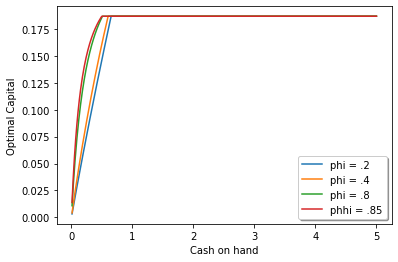

In [66]:
fig, ax = plt.subplots()
ax.plot(w_grid, k_20, label = "phi = .2")
ax.plot(w_grid, k_40, label = "phi = .4")
ax.plot(w_grid, k_80, label = "phi = .8")
ax.plot(w_grid, k_85, label = "phhi = .85")
ax.set_ylabel("Optimal Capital")
ax.set_xlabel("Cash on hand")
ax.legend(shadow = True, fancybox = True)
plt.show()

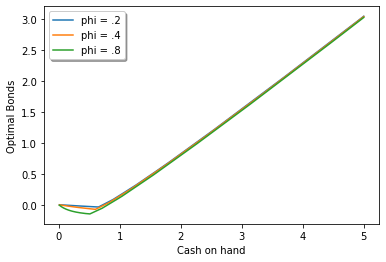

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(w_grid, b_20, label = "phi = .2")
ax.plot(w_grid, b_40, label = "phi = .4")
ax.plot(w_grid, b_80, label = "phi = .8")
#ax.plot(w_grid, b_85, label = .85)
ax.set_ylabel("Optimal Bonds")
ax.set_xlabel("Cash on hand")
ax.legend(shadow = True, fancybox = True)
plt.show()

In [68]:
#define the time path of capital
#algorithm similar to problem last week--idea: use policy functions already computed in vfi
def find_time_path(w_0, w_grid, kpolicy, bpolicy, T):
    k_path = np.zeros(T)
    b_path = np.zeros(T)
    w_path = np.zeros(T)

    for i in range(T):
      #closest grid point to initial wealth level
      gridpt = np.argmin(abs(w_grid - w_0))
      #use policy functions
      k_path[i] = kpolicy[gridpt]
      b_path[i] = bpolicy[gridpt]
      w_path[i] = w_0
      #update cash on hand for next period based on policy choices
      w_0 = production(k_path[i]) + R*b_path[i]

    return (k_path, b_path, w_path)       

In [69]:
#run time path of capital function
k_path_80 = find_time_path(.1, w_grid, k_80, b_80, 20)[0]
k_path_40 = find_time_path(.1, w_grid, k_40, b_40, 20)[0]
k_path_20 = find_time_path(.1, w_grid, k_20, b_20, 20)[0]

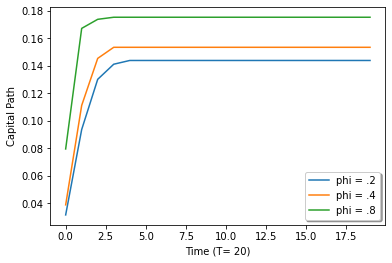

In [70]:
#plot time path of capital
fig, ax = plt.subplots()
ax.plot(np.arange(20), k_path_20, label = "phi = .2")
ax.plot(np.arange(20), k_path_40, label = "phi = .4")
ax.plot(np.arange(20), k_path_80, label = "phi = .8")
#ax.plot(w_grid, b_85, label = .85)
ax.set_ylabel("Capital Path")
ax.set_xlabel("Time (T= 20)")
ax.legend(shadow = True, fancybox = True)
plt.show()

**Consideration of $\beta R$**

We first note that $\beta R$<1 means that $\beta < \frac{1}{R}$ Intuitively, $\beta R$<1 enforces the realization of the tradeoff between consumption and savings today for the representative entrepreneur. Ceteris paribus, the entrepreneur prefers to consume today rather than save today and consume tomorrow. In particular, tomorrow’s return on 1 unit of investment is insufficient to offset the “penalty” of consumption tomorrow via the discounting of the future ($\beta$). Equivalently, the decision to hold bonds today is governed by an implicit preference to consumption smooth rather than an absolute gain in “monetary” (real) value in utility by doing so. The case where $\beta < \frac{1}{R}$ is really the only interesting case because $\beta R = 1$ corresponds to perfect consumption smoothing, while the case $\beta R > 1$ is degenerate in some sense. For the hyper-patient representative entrepreneur, it is always advantageous to save today and consume tomorrow because the present value of future consumption is always greater than the present value of present consumption. In the infinite horizon problem, this type of entrepreneur is problematic precisely because "tomorrow" is infinite and the agent can in some sense perpetually delay consumption. 

Analytically, $\beta R$<1 generates the contraction in the bellman operator. This is what makes it possible to apply Banach’s CMT. Running the code, we can see that initial guesses actually have increasing errors as we run the VFI, indicating that we move away from convergence by repeated iteration. \\

To make the intuitive and analytic arguments more precisely, from the setup of the model/Bellman equation, we can differentiate the Bellman equation obtained in part a of this question to get: 
\begin{align*}
V'(w) = u'(w - b' - k')
\end{align*}
From the FOCs for the bond choice: 
\begin{align*}
u'(w - b' - k') = \beta RV'(k'^* + Rb')
\end{align*}
Subbing in the FOCs into the differentiated value function: 
\begin{align*}
v'(w) = \beta RV'(k'^* + Rb')
\end{align*}
From how we define cash on hand, $w' = k'^8 + Rb'$, so the RHS of the above equation is simply $\beta RV'(w')$. Because we assumed that the value function is strictly increasing everywhere, it must be strictly increasing on an interval (here the interval is the real line). It follows that: 
\begin{align}
V'\big(\frac{w}{w'} \big) = \beta R
\end{align}
Here we use the strict concavity of the value function to see that the relationship between $w, w'$ depends on the value of $\beta R$. In particular, for the case where $\beta R < 1$, this means that the ratio of the derivatives of w,w' is less than 1, meaning that the growth rate at w' is higher than the growth rate at w. Because growth rates decrease as the input increases, this indicates that w' must be strictly less than w. Identical analysis yields that if $\beta R > 1$, then the growth rate at w is greater than the growth rate at w', meaning that w must be less than w'. If $\beta R = 1$, then we can use the (implied) injective property of the value function to get that w=w'. \\

**The Role of Credit Constraints**

Financial frictions are a distortion because they make entrepreneurs choose something they otherwise would not have. In plain words, the presence of a financial friction makes the entrepreneurs weakly worse off because they can always select the constrained optimum when they are unconstrained, and yet the solutions never line up in the constrained region (at least given that $\beta R <1$). In other words, a constrained region must exist for at all admissible $\phi$ values from the contracting property explained in part d. The size of the distortionary effect generated by the financial friction is determined by the value of $\phi$. In particular, for $\phi$ looser, the number of the representative agent’s initial wealth stocks that are subjected to a choice restriction is lower, meaning that the unconstrained optimum is attained for more values. Implicitly, utility is higher under a looser constraint. \\

From the graphs in part c, the most striking difference is in the time path of capital plot. The larger values of $\phi$ achieve the respective steady-state capital value both faster and at a higher steady state level of capital holdings. Here the notion of reaching steady state faster is in terms of time, but more importantly in terms of the amount of cash on hand necessary to get into the steady state. In the infinite horizon problem, the exact timing of the transition into the steady state doesn't impact the overall lifetime utility, but the reduced cash on hand necessary to achieve this level of capital is important. This is a simplified model, but if we take the results of this modelling exercise to be policy implications, this suggests that loosening financial frictions yields faster capital steady state convergence. The inequality dimension is striking, in that allowing more borrowing yields a faster convergence to a steady state where entrepreneurs with different starting points of cash on hand end up closer together more quickly. This kind of result is particularly important in the context of small businesses (also startups) that are known to fail quickly. Thus, allowing more borrowing is an expansionary policy with respect to the choice of capital. \\

The bond and capital graphs are interesting in the sense that varying the $\phi$ parameter nicely helps to capture the "inverse" relationship between the bond and capital policy functions against wealth. This is analytically obvious because $c = w - b - k$, so it follows that there is a clear "substitution effect" between bonds and capital. At low levels of cash on hand, the more constrained borrowers are able to invest less in capital and subsequently choose to hold more bonds, while the opposite is true at low levels of wealth for less constrained borrowers. In both of these graphs, the wealth value associated with the kink point of both capital and bond holdings is the exact threshold value where the consumer moves between the constrained and unconstrained regions. The threshold is lower at higher values of $\phi$. 


As an interesting aside, for the social planner, the motivation to include such a financial friction is driven by a different set of considerations than the pure utility framework laid out in this model. This friction reflects the fact that “coordination” of borrowers and lenders is costly in some sense, and so there is a social optimum achieved by restricting borrowing in this way. 